(work_and_energy)=
# Work and Energy 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

## Work-energy theorem

Mathematically, work-energy theorem is stated as the following:

\[W_{12}=\int_{x_1}^{x_2}F(x)dx\]

where \(W_{12}\) is the work done on a body by the force \(F\) as the body moves from point \(x_1\) to \(x_2\). 

\(W_{12}\) is equal to the change in energy when the body moves from \(x_1\) to \(x_2\). 

## Forms of energy

### Kinetic energy

\[KE=\frac{1}{2}mv^2\]

where \(m\) is mass, \(v\) is velocity

### Potential energy

#### Gravitational potential energy

\[GPE(x)=mgx\]

where \(m\) is mass, \(g\) is gravitational acceleration, \(x\) is the height above a reference point where \(x=0\)

#### Elastic potential energy

\[EPE(x)=\frac{1}{2}kx^2\]

Note: **total energy is constant over time**

### Equipartition of Energy

The principle of equipartition of energy states that **at thermal equilibrium, magnitude of different forms of energy are equal on average**.

## Tutorial Problem 3.6

Consider a body connected to a spring, oscillating according to \(x(t)=x_0cos(\sqrt{\frac{k}{m}}t)\). 

Derive expressions for the elastic potential energy of the body as a function of time, for the kinetic energy of the body as a function of time, and for the total energy of the body as a function of time. 

Draw a simple sketch of these energies as a function of time. What is the average value of KE, and the average value of EPE, over one period? You should find that the average values of KE and EPE are equal.

Average EPE = 62J
Average KE = 62J


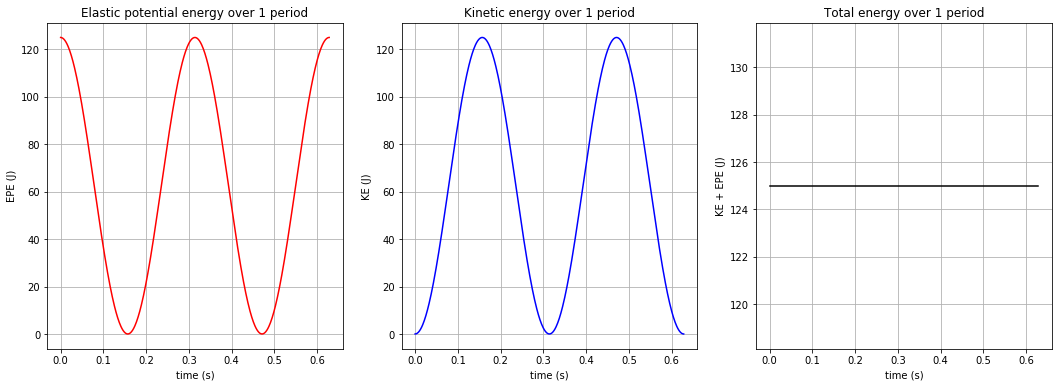

In [4]:
g = 9.81 # m/s2

# input arbitrary numbers
m = 10 # mass kg
k = 1e3 # spring constant N/m
x0 = 0.5 # m

T = 2 * np.pi * np.sqrt(m/k) # period in simple harmonic motion

t = np.linspace(0, T, 500)

X = x0 * np.cos(np.sqrt(k/m)*t)

dxdt = -x0 * np.sqrt(k/m) * np.sin(np.sqrt(k/m)*t)

epe = 0.5 * k * X**2

ke = 0.5 * m * dxdt**2

average_epe = np.sum(epe)/len(epe)

average_ke = np.sum(ke)/len(ke)

print("Average EPE = %.dJ" % (average_epe))
print("Average KE = %.dJ" % (average_ke))

# plot figures of EPE, KE, and total energy over 1 period

fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(131)
ax1.plot(t, epe, 'r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('EPE (J)')
ax1.set_title('Elastic potential energy over 1 period')
ax1.grid(True)

ax2 = fig.add_subplot(132)
ax2.plot(t, ke, 'b')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('KE (J)')
ax2.set_title('Kinetic energy over 1 period')
ax2.grid(True)

ax3 = fig.add_subplot(133)
ax3.plot(t, ke+epe, 'k')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('KE + EPE (J)')
ax3.set_title('Total energy over 1 period')
ax3.grid(True)

plt.show()

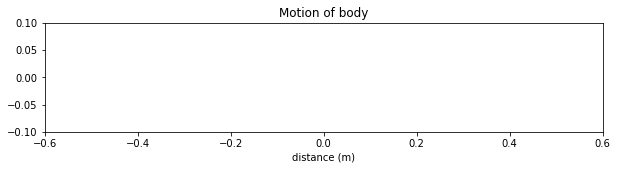

In [5]:
nframes = len(t)

# plot background axes
fig, ax = plt.subplots(figsize=(10,2))

# customise axes
ax.set_xlim((-0.6, 0.6))
ax.set_ylim((-0.1, 0.1))
ax.set_xlabel('distance (m)')
ax.set_title('Motion of body')

# plot line
line, = ax.plot([], [], 'ro', lw=2)

# plot background for each frame
def init():
    line.set_data([], [])
    return (line,)

# plot data for each frame
def animate(i):
    x = X[i]
    y = 0
    line.set_data(x, y)
    return (line,)

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=10, 
                               blit=True)

In [6]:
HTML(anim.to_html5_video())

### References

Course notes from Lecture 3 of the module ESE 95011 Mechanics